Code Artefact for Module AI in Action

written by:
    Lisette Latell
    Benjamin Kusch
    Alex Meinert

In [1]:
#import everthing and ensure the versions are up to date

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
import re
import warnings
from sklearn import preprocessing
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim
from nltk.data import find
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from gensim.models.word2vec import Word2Vec
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import classification_report
import torch
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

warnings.filterwarnings('ignore')

In [2]:
#load dataset

df = pd.read_excel('AI in Action_Negoisst-Training-Data.xlsx', index_col=0)
df

,ReceiverID,ActionType,NegoOutcome,Content
SenderID,,,,
31,32,Offer,FinalAccept,"Hey Chris, Great that we are working together ..."
32,31,Counteroffer,FinalAccept,"Hey Alex, The pleasure is all mine. For starte..."
31,32,Counteroffer,FinalAccept,"Hey Chris, Thank you for your response. I am..."
32,31,Counteroffer,FinalAccept,"Hello Alex, I think we have a solid compromis ..."
31,32,Question,FinalAccept,"Dear Chris, I am glad to hear that you are wil..."
...,...,...,...,...
851,856,Counteroffer,FinalReject,"Dear Chis Meyer,\n \nthank you for your latest..."
856,851,Counteroffer,FinalReject,"Dear Alex Kramer,\nthank you very much for you..."
851,856,Counteroffer,FinalReject,"Dear Chris Meyer,\nthank you for your fast ans..."


In [3]:
df.isnull().sum()

df['Length'] = df['Content'].str.len()
df.head(10)

,ReceiverID,ActionType,NegoOutcome,Content,Length
SenderID,,,,,
31,32,Offer,FinalAccept,"Hey Chris, Great that we are working together ...",1778
32,31,Counteroffer,FinalAccept,"Hey Alex, The pleasure is all mine. For starte...",1949
31,32,Counteroffer,FinalAccept,"Hey Chris, Thank you for your response. I am...",693
32,31,Counteroffer,FinalAccept,"Hello Alex, I think we have a solid compromis ...",452
31,32,Question,FinalAccept,"Dear Chris, I am glad to hear that you are wil...",1349
32,31,Clarification,FinalAccept,"Dear Alex, Thanks for elaborating. Let's pop t...",134
31,32,FinalAccept,FinalAccept,Great! Hereby my official confirmation of the ...,113
33,34,Offer,FinalAccept,"Dear Chris, Hopefully you are doing well. Ther...",2220
34,33,Counteroffer,FinalAccept,"Dear Alex, Thanks a lot for your message! I am...",2282


In [4]:
#WordCount

def word_count(content):
    content_list = content.split()
    return len(content_list)

df['Word count of nego message'] = df['Content'].apply(word_count)
df.head(10)

,ReceiverID,ActionType,NegoOutcome,Content,Length,Word count of nego message
SenderID,,,,,,
31,32,Offer,FinalAccept,"Hey Chris, Great that we are working together ...",1778,309
32,31,Counteroffer,FinalAccept,"Hey Alex, The pleasure is all mine. For starte...",1949,337
31,32,Counteroffer,FinalAccept,"Hey Chris, Thank you for your response. I am...",693,123
32,31,Counteroffer,FinalAccept,"Hello Alex, I think we have a solid compromis ...",452,77
31,32,Question,FinalAccept,"Dear Chris, I am glad to hear that you are wil...",1349,249
32,31,Clarification,FinalAccept,"Dear Alex, Thanks for elaborating. Let's pop t...",134,22
31,32,FinalAccept,FinalAccept,Great! Hereby my official confirmation of the ...,113,18
33,34,Offer,FinalAccept,"Dear Chris, Hopefully you are doing well. Ther...",2220,381
34,33,Counteroffer,FinalAccept,"Dear Alex, Thanks a lot for your message! I am...",2282,407


In [5]:
df['NegoOutcome'].value_counts()

NegoOutcome
FinalAccept    1795
FinalReject     459
Name: count, dtype: int64

In [6]:
accepted_messages = df[df['NegoOutcome']=='FinalAccept']['Content']
accepted_messages

SenderID
31      Hey Chris, Great that we are working together ...
32      Hey Alex, The pleasure is all mine. For starte...
31      Hey Chris,  Thank you for your response.  I am...
32      Hello Alex, I think we have a solid compromis ...
31      Dear Chris, I am glad to hear that you are wil...
                              ...                        
1151    Dear Chris Meyer,\nIm happy that you accepted ...
1156    Dr. Mr Kramer,\nthank you for your fast reply....
1151    Dear Mr.Chris Meyer,\nI understand your proble...
1156    Dear Mr. Kramer,\nI propose we think out of th...
1151    Dear Mr.Meyer,\nThank you for your last offer....
Name: Content, Length: 1795, dtype: object

In [7]:
rejected_messages = df[df['NegoOutcome']=='FinalReject']['Content']
rejected_messages.count()
df

,ReceiverID,ActionType,NegoOutcome,Content,Length,Word count of nego message
SenderID,,,,,,
31,32,Offer,FinalAccept,"Hey Chris, Great that we are working together ...",1778,309
32,31,Counteroffer,FinalAccept,"Hey Alex, The pleasure is all mine. For starte...",1949,337
31,32,Counteroffer,FinalAccept,"Hey Chris, Thank you for your response. I am...",693,123
32,31,Counteroffer,FinalAccept,"Hello Alex, I think we have a solid compromis ...",452,77
31,32,Question,FinalAccept,"Dear Chris, I am glad to hear that you are wil...",1349,249
...,...,...,...,...,...,...
851,856,Counteroffer,FinalReject,"Dear Chis Meyer,\n \nthank you for your latest...",1755,338
856,851,Counteroffer,FinalReject,"Dear Alex Kramer,\nthank you very much for you...",1460,263
851,856,Counteroffer,FinalReject,"Dear Chris Meyer,\nthank you for your fast ans...",673,133


In [8]:
# add variable to set outcome to 0 or 1

df['NegoOutcomeLabel'] = df.NegoOutcome.map({'FinalReject':0, 'FinalAccept':1})
df.head()

,ReceiverID,ActionType,NegoOutcome,Content,Length,Word count of nego message,NegoOutcomeLabel
SenderID,,,,,,,
31,32,Offer,FinalAccept,"Hey Chris, Great that we are working together ...",1778,309,1
32,31,Counteroffer,FinalAccept,"Hey Alex, The pleasure is all mine. For starte...",1949,337,1
31,32,Counteroffer,FinalAccept,"Hey Chris, Thank you for your response. I am...",693,123,1
32,31,Counteroffer,FinalAccept,"Hello Alex, I think we have a solid compromis ...",452,77,1
31,32,Question,FinalAccept,"Dear Chris, I am glad to hear that you are wil...",1349,249,1


Text(0.5, 1.0, 'Rejected Messages')

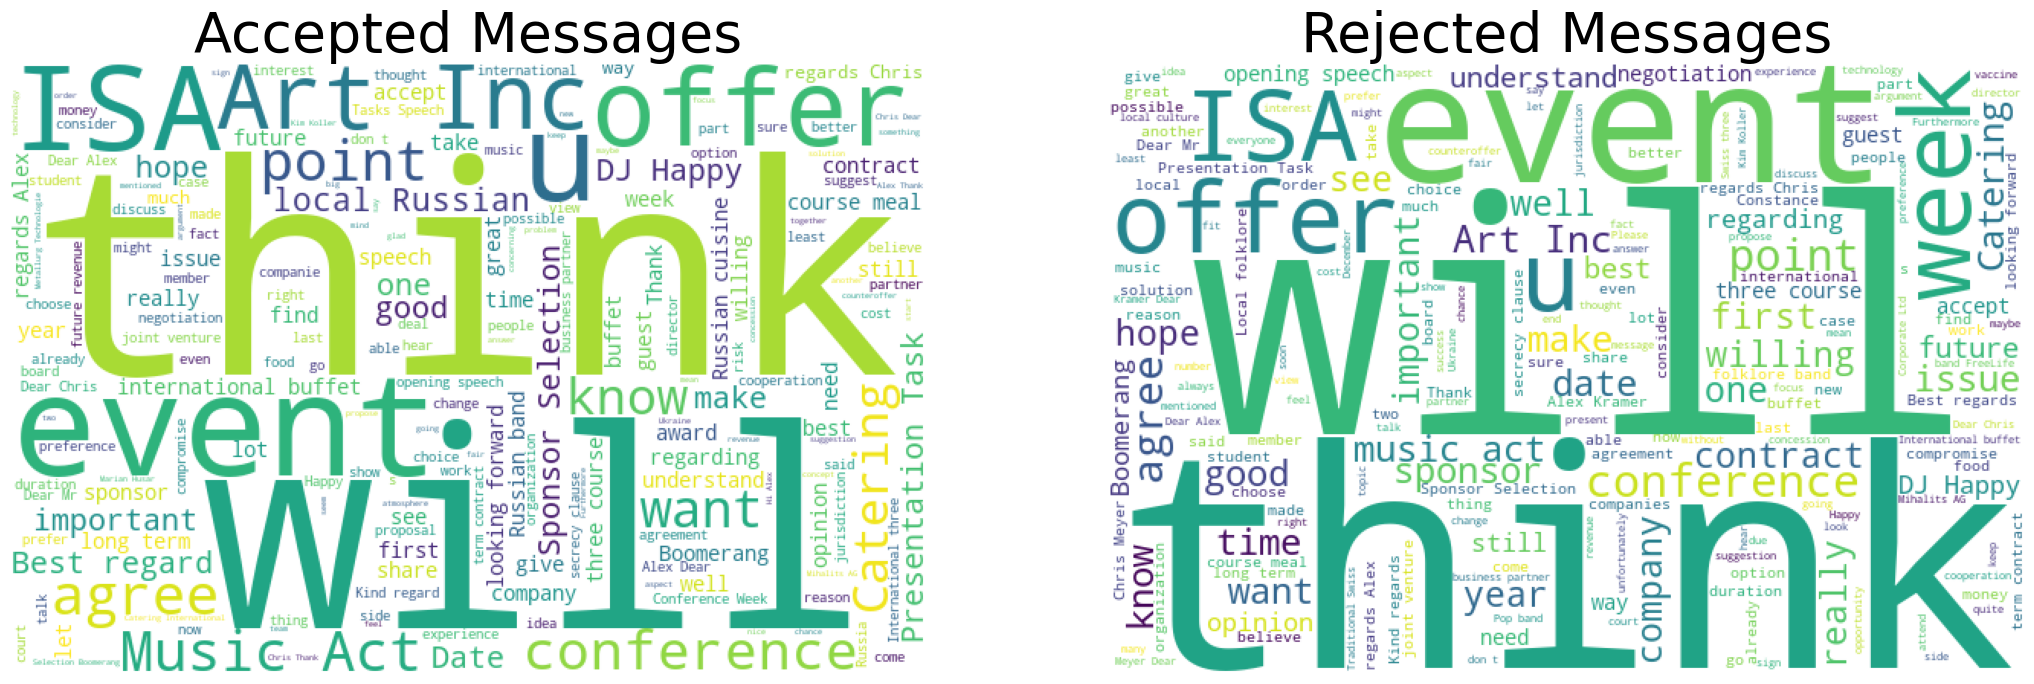

In [9]:
#wordcloud
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[26,8])

wordcloud1 = WordCloud(background_color='white', width=600, height=400).generate(" ".join(accepted_messages))
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Accepted Messages', fontsize=40)

wordcloud2 = WordCloud(background_color='white', width=600, height=400).generate(" ".join(rejected_messages))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Rejected Messages', fontsize=40)

In [10]:
all_messages = df["Content"]
all_messages

SenderID
31     Hey Chris, Great that we are working together ...
32     Hey Alex, The pleasure is all mine. For starte...
31     Hey Chris,  Thank you for your response.  I am...
32     Hello Alex, I think we have a solid compromis ...
31     Dear Chris, I am glad to hear that you are wil...
                             ...                        
851    Dear Chis Meyer,\n \nthank you for your latest...
856    Dear Alex Kramer,\nthank you very much for you...
851    Dear Chris Meyer,\nthank you for your fast ans...
856    Dear Alex Kramer,\nI am still very interested ...
851    Dear Chris Meyer,\n \nI'm so sorry but I can n...
Name: Content, Length: 2254, dtype: object

In [11]:
#Regex cleaning and tokenazation

def clean_text(message):
    #lowercasing
    message = message.lower()
    
    #regular expressions, gerne mal nachschauen wie das funktioniert
    message = re.sub('\[.*?\]', '', message)
    message = re.sub('https?://\S+|www\.\S+', '', message)
    message = re.sub('<.*?>+', '', message)
    message = re.sub('[%s]' % re.escape(string.punctuation), '', message)
    message = re.sub('\n', '', message)
    message = re.sub('\w*\d\w*', '', message)
    
    return message


df["Content"] = df["Content"].apply(lambda x: clean_text(x))
df["Content"].head()

SenderID
31    hey chris great that we are working together f...
32    hey alex the pleasure is all mine for starters...
31    hey chris  thank you for your response  i am g...
32    hello alex i think we have a solid compromis a...
31    dear chris i am glad to hear that you are will...
Name: Content, dtype: object

In [12]:
# Tokenizer initialisieren
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')

# Tokenizer auf Rohtext anwenden
df['Content'] = df['Content'].apply(lambda x: tokenizer.tokenize(x) if isinstance(x, str) else x)

# Überprüfe das Ergebnis
print(df['Content'].head())

SenderID
31    [hey, chris, great, that, we, are, working, to...
32    [hey, alex, the, pleasure, is, all, mine, for,...
31    [hey, chris, thank, you, for, your, response, ...
32    [hello, alex, i, think, we, have, a, solid, co...
31    [dear, chris, i, am, glad, to, hear, that, you...
Name: Content, dtype: object


In [13]:
nltk.download('stopwords')
stopwords_en = stopwords.words('english')
def remove_stopwords(text):
    words=[w for w in text if w not in stopwords.words('english')]
    return words

df['Content'] = df['Content'].apply(lambda x: remove_stopwords(x))
df['Content'].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alex\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


SenderID
31    [hey, chris, great, working, together, competi...
32    [hey, alex, pleasure, mine, starters, think, i...
31    [hey, chris, thank, response, glad, hear, agre...
32    [hello, alex, think, solid, compromis, settled...
31    [dear, chris, glad, hear, willing, accept, ter...
Name: Content, dtype: object

In [14]:
def combine_text(list_of_text):
    combined_text = ' '.join(list_of_text)
    return combined_text

df['Content'] = df['Content'].apply(lambda x: combine_text(x))
df['Content']

SenderID
31     hey chris great working together competition h...
32     hey alex pleasure mine starters think importan...
31     hey chris thank response glad hear agree date ...
32     hello alex think solid compromis settled willi...
31     dear chris glad hear willing accept terms come...
                             ...                        
851    dear chis meyer thank latest offer points comp...
856    dear alex kramerthank much latest offer happy ...
851    dear chris meyerthank fast answer happy found ...
856    dear alex krameri still interested coming join...
851    dear chris meyer im sorry accept less mei unde...
Name: Content, Length: 2254, dtype: object

In [15]:
corpus=[]
new=df['Content'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]
corpus

['hey',
 'chris',
 'great',
 'working',
 'together',
 'competition',
 'hereby',
 'first',
 'proposal',
 'negotiations',
 'catering',
 'suggest',
 'go',
 'international',
 'buffet',
 'order',
 'able',
 'network',
 'atmosphere',
 'relaxed',
 'easygoing',
 'opinion',
 'formal',
 'threecourse',
 'meal',
 'makes',
 'impossible',
 'furthermore',
 'since',
 'many',
 'people',
 'familiar',
 'russian',
 'cuisine',
 'suggest',
 'go',
 'international',
 'food',
 'order',
 'everyone',
 'find',
 'food',
 'like',
 'date',
 'conference',
 'suggest',
 'week',
 'first',
 'week',
 'conference',
 'colides',
 'international',
 'conference',
 'economics',
 'business',
 'management',
 'moscow',
 'second',
 'week',
 'isa',
 'higher',
 'ranked',
 'members',
 'unavailable',
 'week',
 'four',
 'would',
 'close',
 'christmas',
 'holiday',
 'last',
 'week',
 'christmas',
 'guess',
 'around',
 'christmas',
 'many',
 'people',
 'time',
 'go',
 'event',
 'week',
 'seem',
 'problems',
 'music',
 'act',
 'suggest',
 '

In [16]:
# from now on we have two, for now, identical dataframes, one will be lemmatized one will be stemmerized

stemm_df = df.copy()
lemm_df = df.copy()

stemm_df['Content']
lemm_df['Content']


SenderID
31     hey chris great working together competition h...
32     hey alex pleasure mine starters think importan...
31     hey chris thank response glad hear agree date ...
32     hello alex think solid compromis settled willi...
31     dear chris glad hear willing accept terms come...
                             ...                        
851    dear chis meyer thank latest offer points comp...
856    dear alex kramerthank much latest offer happy ...
851    dear chris meyerthank fast answer happy found ...
856    dear alex krameri still interested coming join...
851    dear chris meyer im sorry accept less mei unde...
Name: Content, Length: 2254, dtype: object

In [17]:
print(lemm_df['Content'].head())


SenderID
31    hey chris great working together competition h...
32    hey alex pleasure mine starters think importan...
31    hey chris thank response glad hear agree date ...
32    hello alex think solid compromis settled willi...
31    dear chris glad hear willing accept terms come...
Name: Content, dtype: object


In [18]:
# Initialisiere den WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Funktion zur Lemmatisierung einer Liste von Tokens
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

# Lemmatisierung auf die Spalte 'Content' anwenden
lemm_df['Content'] = lemm_df['Content'].apply(lemmatize_tokens)

# Ergebnis überprüfen
print(lemm_df['Content'].head())

SenderID
31    [h, e, y,  , c, h, r, i, s,  , g, r, e, a, t, ...
32    [h, e, y,  , a, l, e, x,  , p, l, e, a, s, u, ...
31    [h, e, y,  , c, h, r, i, s,  , t, h, a, n, k, ...
32    [h, e, l, l, o,  , a, l, e, x,  , t, h, i, n, ...
31    [d, e, a, r,  , c, h, r, i, s,  , g, l, a, d, ...
Name: Content, dtype: object
